# HR Diagram

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../tic_catalog_v3.txt',sep='\t')

In [3]:
data

,tic_id,Tmag,GAIAmag,gaiabp,gaiarp,d,plx
0,269273552,-1.745,NaN,NaN,NaN,NaN,NaN
1,175934060,-1.679,NaN,NaN,NaN,NaN,NaN
2,459832522,-1.254,NaN,NaN,NaN,11.2575,88.83
3,245873777,-1.200,NaN,NaN,NaN,20.4332,48.94
4,272314138,-1.043,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
13275767,10000693211,13.000,NaN,NaN,NaN,NaN,NaN
13275768,10001083513,13.000,NaN,NaN,NaN,NaN,NaN
13275769,10001920480,13.000,NaN,NaN,NaN,NaN,NaN
13275770,10002253686,13.000,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.dropna(subset=['GAIAmag','gaiabp','gaiarp','d'])
len(data)

12603491

In [5]:
data['b-r'] = data['gaiabp'] - data['gaiarp']

/home/astro/phrdhx/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Absolute magnitude 

$$M = m - 5 log_{10}(d_{pc}) + 5 $$

In [6]:
data['M'] = data['GAIAmag'] - (5 * (np.log10(data['d'])) ) + 5

/home/astro/phrdhx/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


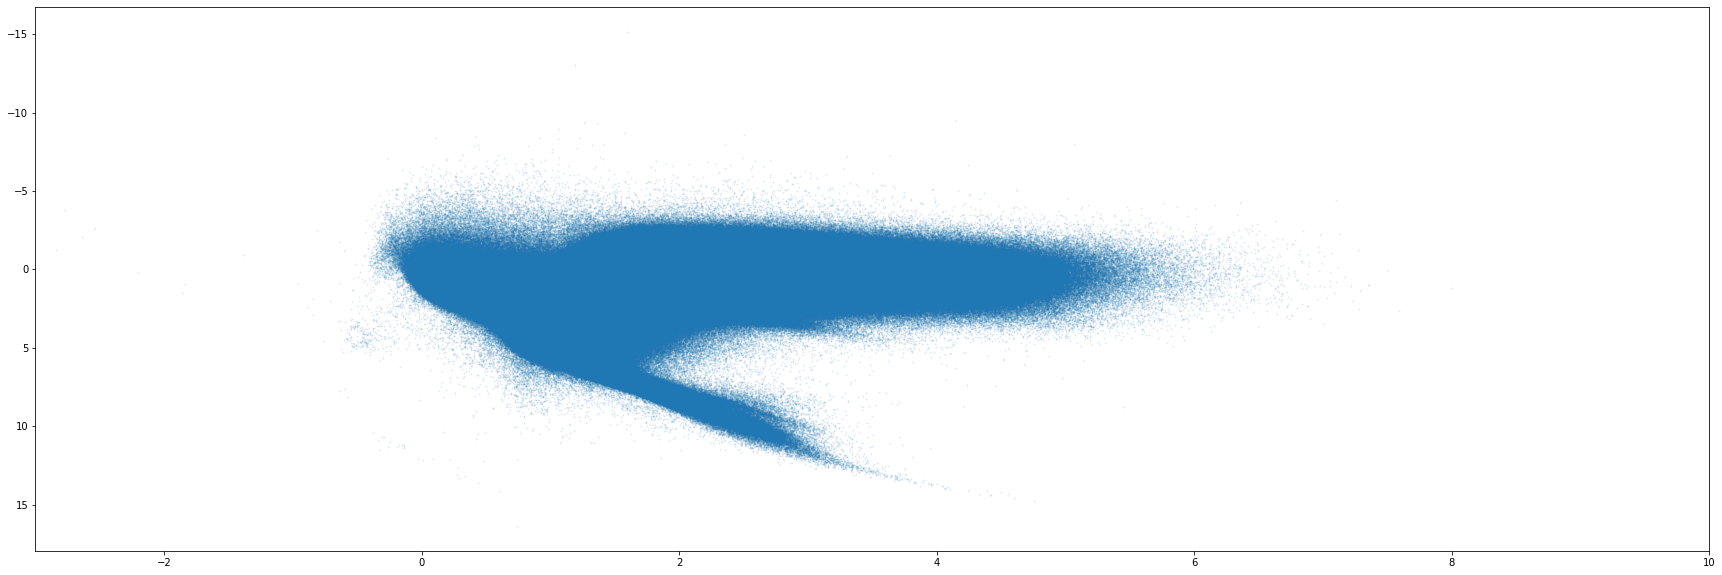

In [7]:
plt.figure(figsize=(30,10))
plt.scatter(data['b-r'],data.M,s=1,alpha=0.1)
plt.gca().invert_yaxis()
plt.xlim([-3,10])
plt.show()

---

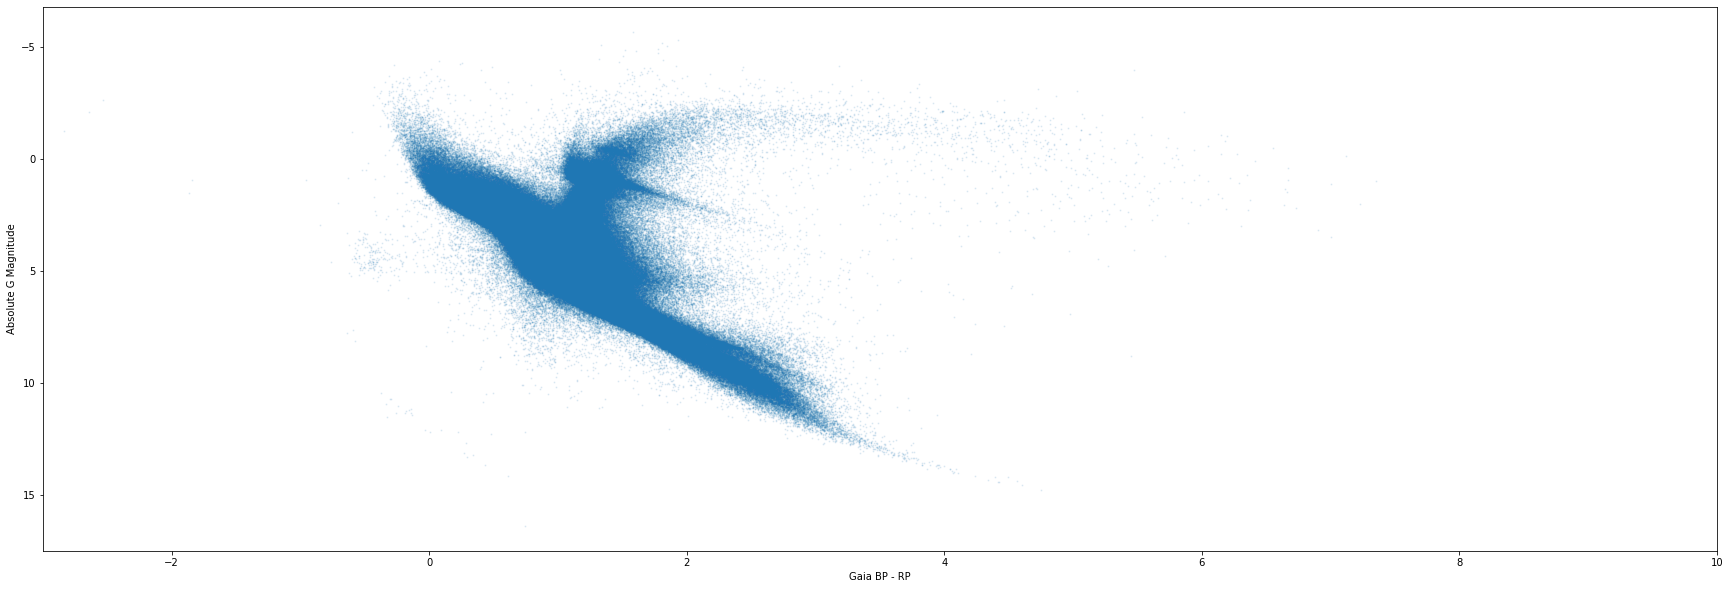

In [8]:
plt.figure(figsize=(30,10))
plt.scatter(data[data.d < 500]['b-r'],data[data.d < 500].M,s=1,alpha=0.1)
plt.gca().invert_yaxis()
plt.xlim([-3,10])
plt.xlabel('Gaia BP - RP')
plt.ylabel('Absolute G Magnitude')
plt.show()

---

### HR Diagram of only candidates

In [9]:
import os
os.chdir('../scripts')
from post_processing import get_output
import json

In [10]:
candidates = pd.read_csv('../som_candidates_eleanor-lite.txt',header=None)
len(candidates)

7848

In [11]:
test = pd.merge(candidates, data, left_on=candidates.iloc[:,1],right_on='tic_id')

In [12]:
a = test.groupby(test.iloc[:,1])

Text(0, 0.5, 'Absolute G Magnitude')

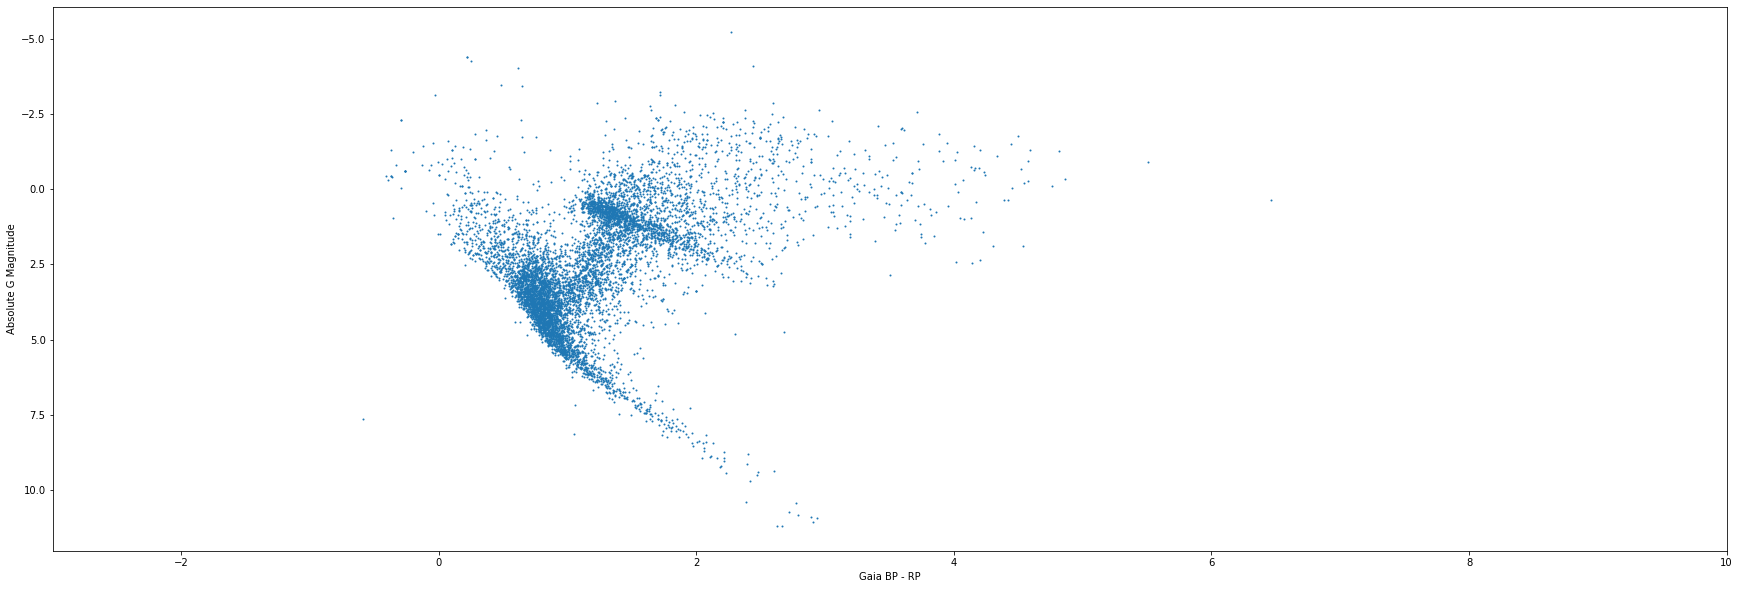

In [13]:
plt.figure(figsize=(30,10))
plt.scatter(test['b-r'],test.M,s=1,alpha=1)
plt.gca().invert_yaxis()
plt.xlim([-3,10])
plt.xlabel('Gaia BP - RP')
plt.ylabel('Absolute G Magnitude')